In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('spam.csv')

In [92]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3374,ham,Yup. Wun believe wat? U really neva c e msg i ...,NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
4673,ham,�� ready then call me...,NaN,NaN,NaN
152,ham,Ok... Ur typical reply...,NaN,NaN,NaN
3403,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...,NaN,NaN,NaN


In [93]:
df.shape

(5570, 5)

In [94]:
## Data Cleaning
## EDA
## Text Preprocessing
## Model Building
## Evaluation
## Improvement
## Website
## Deployment

### Data Cleaning

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [96]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [97]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
## Renaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5117,ham,Lol for real. She told my dad I have cancer
5367,ham,Hi mom we might be back later than &lt;#&gt;
2085,ham,\alright babe
4590,ham,It's ok i wun b angry. Msg u aft i come home t...
774,ham,Why don't you go tell your friend you're not s...


In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [100]:
df['target'] = encoder.fit_transform(df['target'])

In [101]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [103]:
# Check for duplicate values
df.duplicated().sum()

403

In [104]:
df = df.drop_duplicates(keep='first')

In [105]:
df.duplicated().sum()

0

In [106]:
df.shape

(5167, 2)

## EDA

In [107]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [108]:
df['target'].value_counts()

target
0    4514
1     653
Name: count, dtype: int64

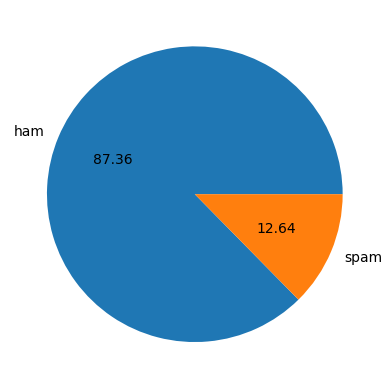

In [109]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%.2f')
plt.show()

In [110]:
import nltk

In [111]:
## Data is imbalanced
df['num_characters'] = df['text'].apply(len)

In [112]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
## number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.wordpunct_tokenize(x)))

In [114]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [115]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

tokenizer = PunktSentenceTokenizer()
df['num_sentences'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)) if isinstance(x, str) else 0)


In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,1
1,0,Ok lar... Joking wif u oni...,29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [117]:
df[['num_characters','num_sentences', 'num_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5167.0,78.943100,58.178429,2.0,36.0,60.0,117.0,910.0
num_sentences,5167.0,1.920844,1.429775,1.0,1.0,1.0,2.0,38.0
num_words,5167.0,19.179214,13.914164,1.0,9.0,15.0,28.0,210.0


In [118]:
#ham
df[df['target'] == 0][['num_characters','num_sentences', 'num_words']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4514.0,70.475188,56.363260,2.0,34.0,52.0,90.0,910.0
num_sentences,4514.0,1.767833,1.354076,1.0,1.0,1.0,2.0,38.0
num_words,4514.0,17.476739,13.775430,1.0,9.0,13.0,22.0,210.0


In [119]:
#spam
df[df['target'] == 1][['num_characters','num_sentences', 'num_words']].describe().T


,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.479326,30.014336,13.0,131.0,148.0,157.0,223.0
num_sentences,653.0,2.978560,1.491129,1.0,2.0,3.0,4.0,9.0
num_words,653.0,30.947933,7.855504,2.0,28.0,32.0,36.0,49.0


In [120]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

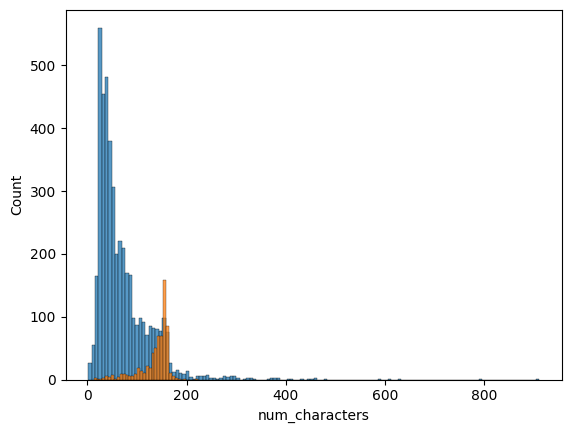

In [121]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

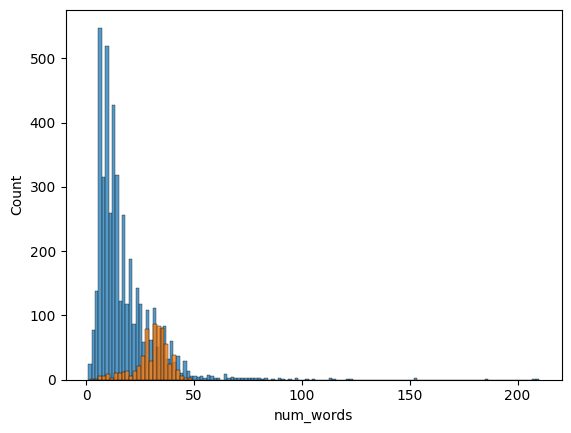

In [122]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

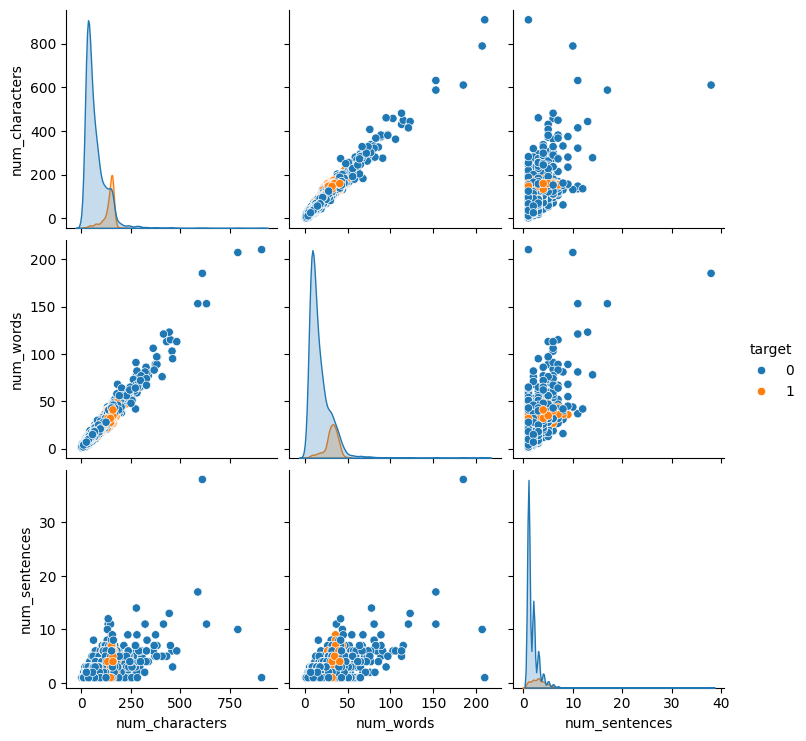

In [123]:
sns.pairplot(df, hue = 'target')

In [124]:
dummy_df = df.drop(columns=['text'])

<Axes: >

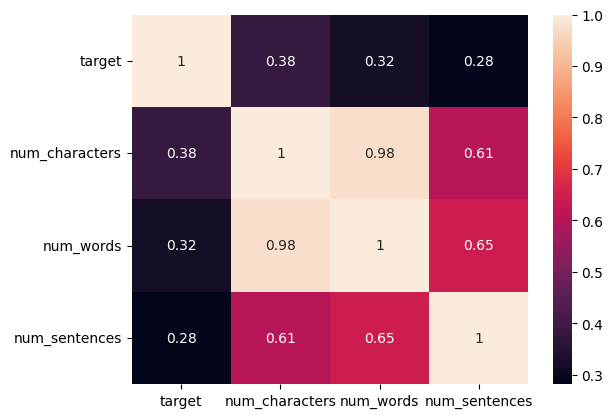

In [125]:
sns.heatmap(dummy_df.corr(), annot = True)

## Data Preprocessing
***Lower Case***
***Tokenization***
***Removing Special Characters***
***Removing Stop words and punctuation***
***Stemming***

In [126]:
from nltk.corpus import stopwords

In [127]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer

In [128]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transfrom_text(text):
    text = text.lower()
    text = nltk.wordpunct_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:


            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [129]:
transfrom_text("Hi how are you YT lectures from Machine Learning?")

'hi yt lectur machin learn'

In [130]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [131]:
dummy_df['text'] = df['text']

In [132]:
dummy_df['transformed_text'] = dummy_df['text'].apply(transfrom_text)

In [133]:
dummy_df.head()

,target,num_characters,num_words,num_sentences,text,transformed_text
0,0,111,24,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,29,8,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,155,39,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,61,16,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [134]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [135]:
dummy_df.head()

,target,num_characters,num_words,num_sentences,text,transformed_text
0,0,111,24,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,29,8,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,155,39,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,61,16,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [136]:
spam_wc = wc.generate(dummy_df[dummy_df['target'] == 1]['transformed_text'].str.cat(sep=" "))

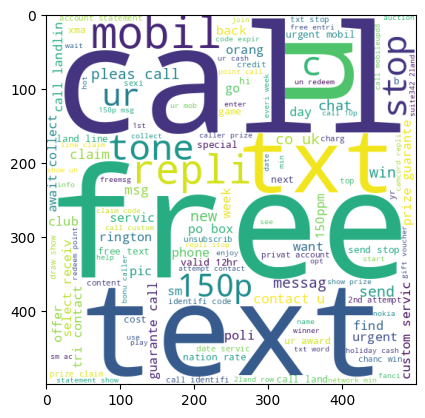

In [137]:
plt.imshow(spam_wc)

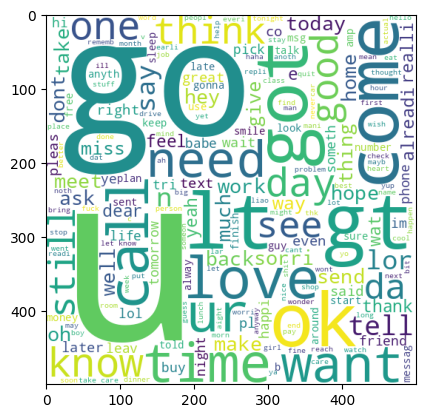

In [138]:
ham_wc = wc.generate(dummy_df[dummy_df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [139]:
dummy_df.head()

,target,num_characters,num_words,num_sentences,text,transformed_text
0,0,111,24,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,29,8,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,155,39,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,61,16,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [140]:
spam_corpus = []
for msg in dummy_df[dummy_df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [141]:
len(spam_corpus)

11741

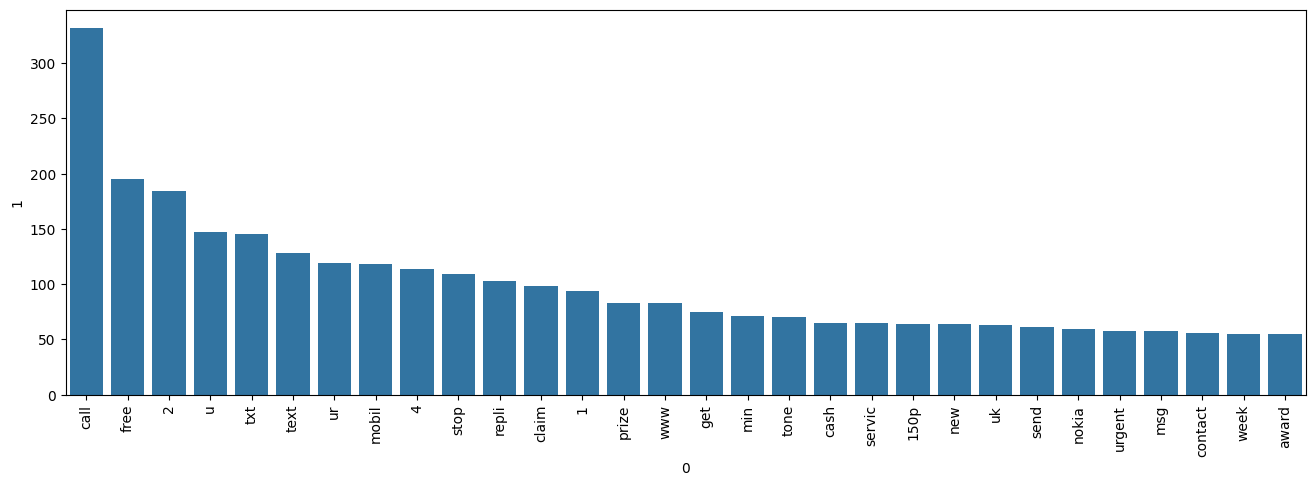

In [142]:
from collections import Counter

plt.figure(figsize=(16,5))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [143]:
ham_corpus = []
for msg in dummy_df[dummy_df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [144]:
len(ham_corpus)

36221

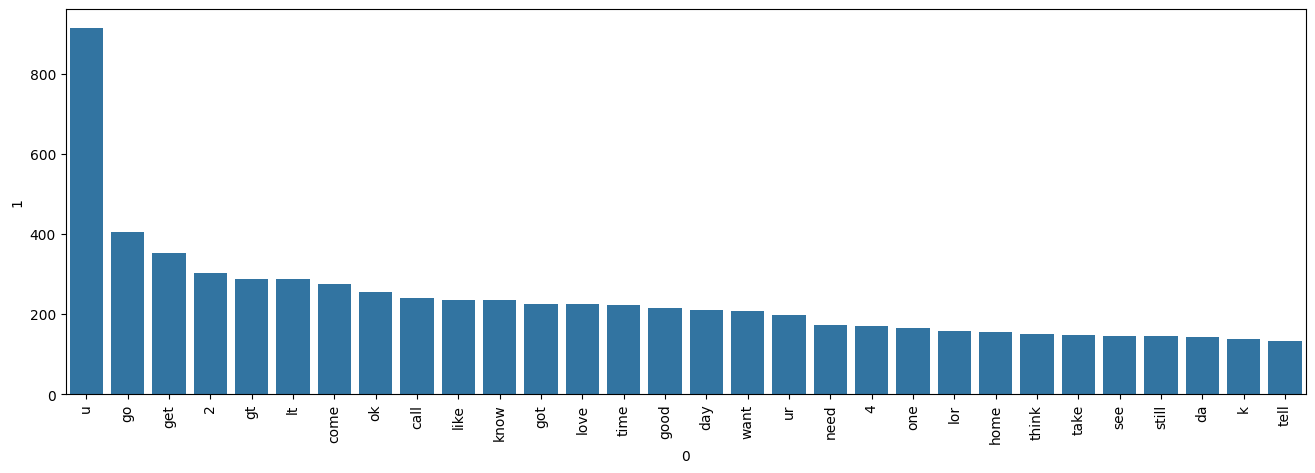

In [145]:
plt.figure(figsize=(16,5))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [146]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [147]:
X = tfidf.fit_transform(dummy_df['transformed_text']).toarray()

In [148]:
X.shape

(5167, 7162)

In [149]:
y = dummy_df['target'].values

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

In [151]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [152]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [153]:
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8810444874274661
[[798 101]
 [ 22 113]]
0.5280373831775701


In [154]:
mb.fit(X_train, y_train)
y_pred2 = mb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [155]:
bb.fit(X_train, y_train)
y_pred3 = bb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9690522243713733
[[896   3]
 [ 29 106]]
0.9724770642201835


In [156]:
## tfidf
dummy_df.head()

,target,num_characters,num_words,num_sentences,text,transformed_text
0,0,111,24,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,29,8,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,155,39,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,61,16,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [157]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [158]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [159]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [160]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision


In [161]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9661508704061895, 0.9716981132075472)

In [162]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9661508704061895
Precision -  0.9716981132075472
For  KN
Accuracy -  0.8994197292069632
Precision -  1.0
For  NB
Accuracy -  0.9574468085106383
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8737864077669902
For  LR
Accuracy -  0.9468085106382979
Precision -  0.925531914893617
For  RF
Accuracy -  0.971953578336557
Precision -  0.9907407407407407
For  Adaboost
Accuracy -  0.9632495164410058
Precision -  0.9217391304347826
For  Bgc
Accuracy -  0.965183752417795
Precision -  0.896
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9736842105263158
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.95
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9565217391304348


In [163]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))